## Analyzing the Stroop Effect


## Table of Contrents
- [Introduction](#intro)
- [Part I - Data Warangling](#data_wrangle)
- [Part II - A/B Test](#test)
- [Part III - Conclusion](#conclusion)
- [Acknowledgment](#acknowledgment)

<a id='intro'></a>

## Introduction
In the Stroop Effect experiment, a list of words is presented to the participants. Their task is to say the ink color in which the word is printed.
There are two conditions for the task: congruent and congruent words. In the congruent word conditon, the colors of the displayed words match their names: For instance,  They are <span style="color:orange">ORANGE</span>,
<span style="color:green">GREEN</span>. In contrast, the colors of incongruent words do not match their names.For example, <span style="color:red">BLUE </span>,<span style="color:blue">RED </span>. The participant will go carry the task and record the time from each condition.





In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
random.seed(42)

<a id='data_wrangle'></a>
## Part I - Data Warangling

In [2]:
# define the path to access the data
path = "F:\data_base\{}".format('stroopdata.csv')

In [3]:
df = pd.read_csv(path)

In [4]:
sum(df.isnull().any())

0

Since the value is zero, there are no null value in this data set.

In [5]:
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


 What is the independent variable? What is the dependent variable?
 **Your Answer**
 The independent variable are the two conditions: congruent , Incongruent.
<br><br>
The dependent variable are the responsed time for each condition in the equal sized lists

<a id='test'></a>
## Part II - A/B Test

Throughout this project letter C an I represent congruent and incongruent conditions repstectively.

In [6]:
print('sample_size ={}'.format(df.shape[0]))

sample_size =24


`1.`What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.


**Answer**
<br><br>
Let $\mu_c$ be the congruent recognition mean time and $\mu_i$ be the incongruent recognition mean time 
<br><br>
Null Hypothesis $H_0$: the time congruent recogizion mean  is equal or greater than the time incongruent recogizion mean.
$\mu_c$ $\geq$ $\mu_i$
    
Alternative Hypothesis $H_0$: the time congruent recogizion mean  is less than the time incongruent recogizion mean. $\mu_c$ $<$ $\mu_i$
    
<br> Since the sample size is less than 30. In addition, the population variance is unknown. It is approriate to use the one sided t-test. The rule of thump is that the data sample is not normally distributed , when the sample is less than 30.
<br> The this t-test would be performed on the paired data, the same individual is exposed and tested for each condition.
<br><br>
Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [7]:
# obtain the 
C_list = df['Congruent'].values.tolist()
I_list = df['Incongruent'].values.tolist()

In [8]:
def get_descriptive_stat(values):
    # return mean, median, variance, standard_deviaiton
    # and standard mean error as a list
    n = len(values)
    package = []
    package.append(np.round(np.mean(values), decimals = 2))
    package.append(np.round(np.median(values), decimals = 2))
    package.append(np.round(np.var(values, ddof = 1), decimals = 2))
    package.append(np.round(np.std(values, ddof = 1), decimals = 2))
    package.append(np.std(values,ddof = 1)/np.sqrt(n))
    return package

In [9]:
# descriptive statistics
C_statistics= get_descriptive_stat(C_list)
I_statistics = get_descriptive_stat(I_list)    

In [10]:
from collections import OrderedDict
dic = OrderedDict()
dic['Statistic'] = ['mean','median','variance','std','SE']
dic['Congruent'] = C_statistics
dic['InCongruent'] = I_statistics 
stat_table = pd.DataFrame(dic)

In [11]:
stat_table 

,Statistic,Congruent,InCongruent
0,mean,14.050000,22.020000
1,median,14.360000,21.020000
2,variance,12.670000,23.010000
3,std,3.560000,4.800000
4,SE,0.726551,0.979195


 Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

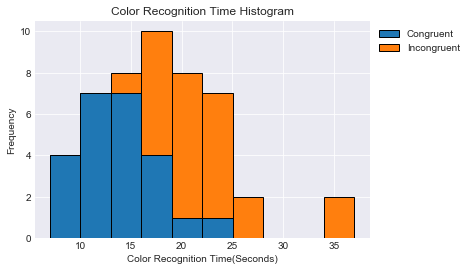

In [12]:
ax = df.plot.hist(stacked = True, range = [7.05, 37] ,edgecolor = "K")
ax.set(title = "Color Recognition Time Histogram",
       xlabel = 'Color Recognition Time(Seconds)')
ax.legend(loc = 'upper left', bbox_to_anchor=(1, 1))

[Text(0,0.5,'Time(second)'),
 Text(0.5,0,'Condition'),
 Text(0.5,1,'Average Recognition Time Bar')]

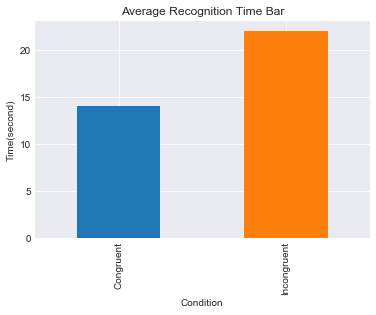

In [13]:
bx = df.mean().plot('bar')
bx.set(title = "Average Recognition Time Bar",
       xlabel = 'Condition', ylabel = 'Time(second)')

IN the historgram. The congruent recognition time is ranged from 8 to 24. For the congruent recognition time is ranged from 12 to 36.This seems that the incongruent recognition time is longer than the congruent one. In addtion, the bar chart shows that incongruent recognition time is longer than congruent one , on average.

<a id='conclusion'></a>
## Part III - Conclusion

Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

Using bootstrap sampling to genenrate 95% confidence interval.

In [14]:
diffs = []
for _ in range(10000):
    bootsample = df.sample(10, replace = True)
    C_time = bootsample.Congruent.mean()
    T_time = bootsample.Incongruent.mean()
    diff = C_time - T_time
    diffs.append(diff)

In [15]:
CI = [np.percentile(diffs, 2.5), np.percentile(diffs, 97.5)]

In [16]:
# get t-stat, P-value, 
stat_result = stats.ttest_rel(C_list,I_list)
# perfomed one side tested, so p value is divied in half
p_value = stat_result.pvalue/2

In [17]:
t_critical = stats.t.ppf(1-0.05, df = 23)

In [18]:
dic1 = OrderedDict()
dic1['t_critical'] = [t_critical]
dic1['p_value'] = [p_value]
dic1['t_statistic'] = [stat_result.statistic]
dic1['95% Confidence_Interval'] = ['{}, {}'.format(str(CI[0]),str(CI[1]))]

In [19]:
pd.DataFrame(dic1)

,t_critical,p_value,t_statistic,95% Confidence_Interval
0,1.713872,2.051500e-08,-8.020707,"-11.163635, -5.2136975"


The p value is less than $\alpha$ = 0.05. The critital value in the negative reaction -1.5. The t statitisc -8.020707 is in the critial region. Therefore, we have evidence to reject the null hypothesis.
<br>
In addtion, there is no zero in the confidence interval (-11.13548, -5.285565), we have evidences of the incongruent recognition mean time is longer than the congruent one.



What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!
<br><br>
The brain dominantly focus on reading words than recognizing color. When the incongruent words are displayed, it stops the reading function, and then start recognizing color. As the result, this takes longer for individual to read the incongruent word than they do for congruent one.
McGurk effect is another similar experiment. The visual information the individual receives, from the speakers, change the way they hear the sounds. In the same manner of the color experiment, the auditory component of one sound is paired with the visual component of another sound.

<a id='acknowledgment'></a>
### Acknowledgment

Special thank to Udacity Project Reviewers whose advices and mentorship help me improve the project.
<br>
Source:
[McGurk effect](https://en.wikipedia.org/wiki/McGurk_effect)